
<h1><center> 🇺🇸 Exploratory Data Analysis 🔎


![Drugs]( https://images.pexels.com/photos/7667800/pexels-photo-7667800.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)





***
# <font color="(65,105,225))" size=10>INFORMATION AND MISSING DATA</font>
***

***
## <font color="(65,105,225))" >BASIC INFORMATION</font>
***


In [64]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

plt.style.use('seaborn-talk')


In [65]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [66]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

***
## <font color="(65,105,225))" >*VARIABLES*</font>
***

Our dataset has twenty-eight columns of four different types.

> ### Age
> ***

|age|
|---|
|12|
|13|
|14|
|15|
|16|
|17|
|18|
|19|
|20|
|21|
|22-23|
|24-25|
|26-29|
|30-34|
|35-49|
|50-64|
|65+|

> ### N
> ***

Number of people who was interviwed in that class

|age|n|
|---|---|
|12|2798|
|13|2757|
|14|2792|
|15|2956|
|16|3058|
|17|3038|
|18|2469|
|19|2223|
|20|2271|
|21|2354|
|22-23|4707|
|24-25|4591|
|26-29|2628|
|30-34|2864|
|35-49|7391|
|50-64|3923|
|65+|2448|

> ### Drug-use
> ***

Percentage of those in an age group who used this drug in the past 12 months. Look at the example below.

|age|n|alcohol-use|
|---|---|---|
|12|2798|3.9|
|13|2757|8.5|
|14|2792|18.1|
|15|2956|29.2|
|16|3058|40.1|
|17|3038|49.3|
|18|2469|58.7|
|19|2223|64.6|
|20|2271|69.7|
|21|2354|83.2|
|22-23|4707|84.2|
|24-25|4591|83.1|
|26-29|2628|80.7|
|30-34|2864|77.5|
|35-49|7391|75.0|
|50-64|3923|67.2|
|65+|2448|49.3|

> ### Drug-frequency
> ***

Median number of times a user in an age group used this drug in the past 12 months. Look at the example below.

|age|	n|	alcohol-use|	alcohol-frequency|
|---|---|---|--------|
| 12|	2798|	3.9|	3.0|
|	13|	2757|	8.5|  6.0|
|	14|	2792|	18.1|	5.0|
|	15|	2956|	29.2|	6.0|
|	16|	3058|	40.1|	10.0|
|	17|	3038|	49.3|	13.0|
|	18|	2469|	58.7|	24.0|
|	19|	2223|	64.6|	36.0|
|	20|	2271|	69.7|	48.0|
|	21|	2354|	83.2|	52.0|
|	22-23|	4707|	84.2|	52.0|
|	24-25|  4591|	83.1|	52.0|
|	26-29|	2628|	80.7|	52.0|
|	30-34|	2864|	77.5|	52.0|
|	35-49|	7391|	75.0|	52.0|
|	50-64|	3923|	67.2|	52.0|
|	65+| 2448|	49.3	|52.0|

***
## <font color="(65,105,225))" >*MISSING DATA*</font>
***

Our missing data is being represented by the '-' character which is considered an str by python. Therefore, our entire column is treated as being of the **object** type, making it impossible for us to apply mathematical methods. Rather than replacing these values with zero, a number that would alter the average calculation significantly. we will replace these values by the average of the two closest values ie the previous value and the later value. If the value after or before does not exist we will consider it zero.

In [68]:
for i in drugs:
  for j in range(len(drugs[i])):
    if (drugs[i][j] == '-'):
      try:
        drugs[i][j] = (float(drugs[i][j-1])+float(drugs[i][j+1]))/2
      except:
        if j == 16:
          drugs[i][j] = float(drugs[i][j-1])/2
        elif j == 0:
          drugs[i][j] = float(drugs[i][j+1])/2
  
drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]] = drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]].astype('float')

drugs.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.00,0.4,46.00,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.00,0.5,180.00,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.00,0.9,45.00,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.00,0.6,30.00,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


***
# <font color="(65,105,225))" size=10>EDA</font>
***

***
## <font color="(65,105,225))" >*PERCENTAGE OF USE*</font>
***

Which drug is most used? we will anwser this question now.

In [69]:
def percentage_use(ds,start = 0 , slice = False):
  percentage_use = []
  for i in ds.columns.to_list()[2:28:2]:
    sum_people = 0
    for j in range(start,start + len(ds),1):
      sum_people += ds['n'][j] * (ds[i][j] * 0.01)
    if (not slice):
      percentage_use.append(float(100*sum_people / sum(ds['n'])))
    else:
      percentage_use.append(sum_people)

  return percentage_use

In [80]:
use_drugs = pd.DataFrame(columns = ['drugs','Percentage of use','Total'], index = range(0, 13))
use_drugs['drugs'] = drugs.columns.to_list()[2:28:2]
use_drugs['drugs'] = use_drugs['drugs'].apply(lambda x: x.split('-')[0]) 

use_drugs['Percentage of use'] = percentage_use(drugs)
use_drugs = use_drugs.sort_values('Percentage of use')
use_drugs['Total'] = [100.0]*len(use_drugs['drugs'])
use_drugs.reset_index(inplace=True)
use_drugs.drop(columns= ['index'], inplace=True)
use_drugs

,drugs,Percentage of use,Total
0,sedative,0.276131,100.0
1,crack,0.319082,100.0
2,heroin,0.353919,100.0
3,meth,0.376077,100.0
4,oxycontin,0.897349,100.0
5,inhalant,1.259881,100.0
6,stimulant,1.811006,100.0
7,cocaine,2.161750,100.0
8,tranquilizer,2.759050,100.0
9,hallucinogen,3.084273,100.0


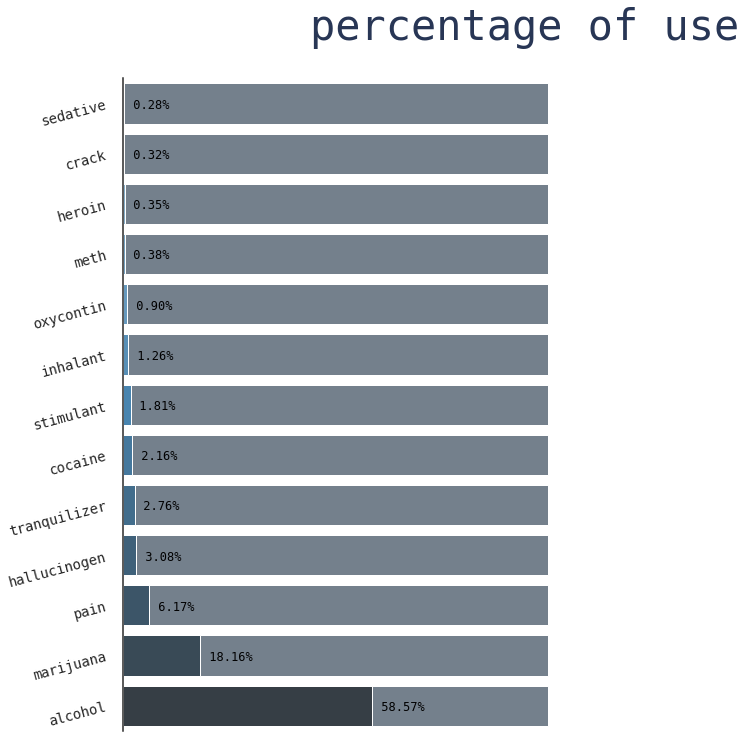

In [77]:
plt.figure(figsize=(8,12))
sns.set_style("white")
plt.title('percentage of use', fontsize = 42, fontname = 'monospace', x = 0.9, y = 1.05, color = '#283655')
a = sns.barplot(data = use_drugs, x = 'Total', y = 'drugs', color = '#708090')
b = sns.barplot(data = use_drugs, x = 'Percentage of use', y = 'drugs', color = 'darkred',palette='Blues_d')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, rotation = 15)
plt.ylabel('')
plt.xlabel('')


a.spines['left'].set_linewidth(1.5)
a.spines['top'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.spines['right'].set_visible(False)

k = 0.1
for i in use_drugs['Percentage of use']:
  plt.text(i + 0.4,k,f'{i: .2f}%', color= 'black', fontname='monospace')
  k = k+ 1.0
 

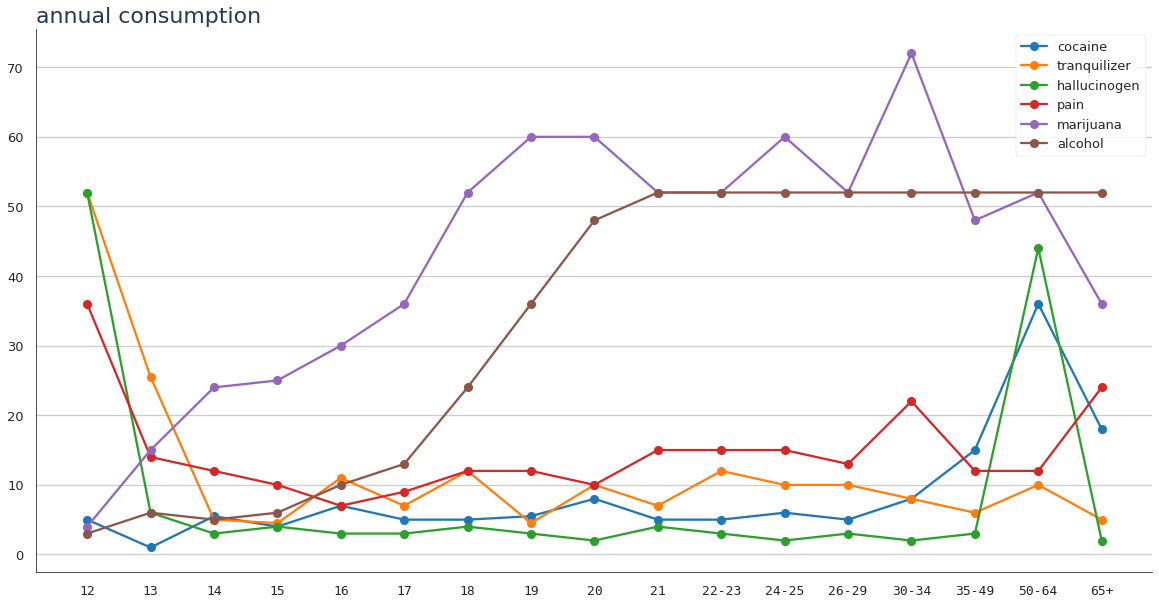

In [72]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

drugs_main = use_drugs.tail(6)["drugs"]
drugs_main = list(drugs_main[:])
drugs_main = [x+'-frequency' for x in drugs_main]
drugs_main[3] = 'pain-releiver-frequency'
plt.grid(axis='y')

j = 0
for i in drugs_main:
  plt.plot(drugs['age'],drugs[i], label = drugs_main[j].split('-')[0], marker = 'o')
  j = j+1

plt.title('annual consumption',fontsize = 22, color = '#283655', loc='left')

plt.xticks(fontname = 'monospace')
plt.legend()
plt.show()


In [73]:
drugs_minor = drugs.head(6)
drugs_minor

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,0.1,35.50,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,0.0,18.75,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,0.1,2.00,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,0.2,1.00,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,0.1,66.50,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,0.1,64.00,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [74]:
use_drugs_minor = pd.DataFrame(columns=['drugs','percentage of use','Total'],index=range(0,13))
use_drugs_minor['drugs'] = drugs_minor.columns.to_list()[2:28:2]
use_drugs_minor['drugs'] = use_drugs_minor['drugs'].apply(lambda x: x.split('-')[0])

use_drugs_minor['percentage of use'] = percentage_use(drugs_minor)
use_drugs_minor = use_drugs_minor.sort_values('percentage of use')
use_drugs_minor['Total'] = [100.0]*len(use_drugs_minor['drugs'])

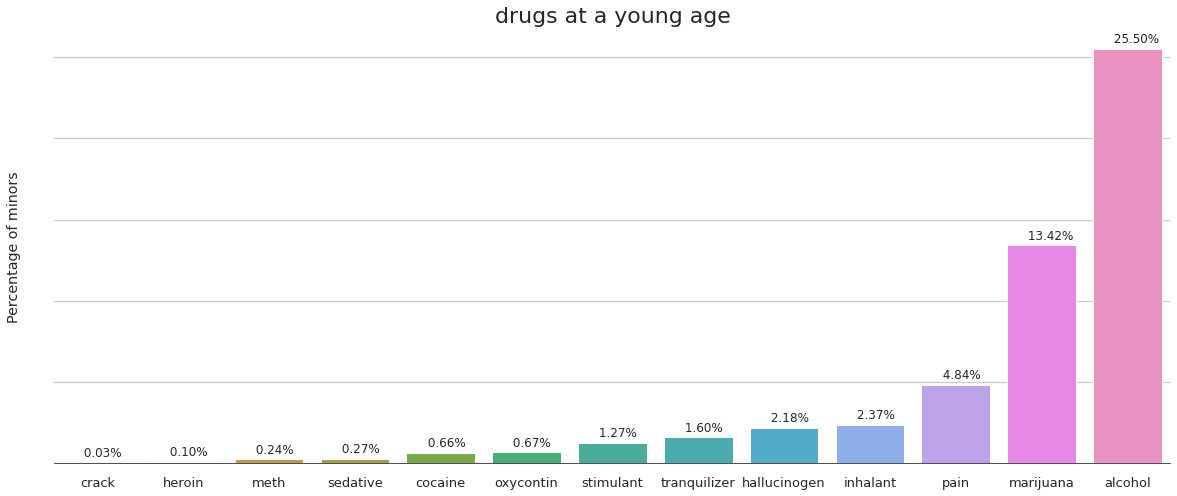

In [75]:
fig, ax = plt.subplots(figsize=(20,8))

sns.set_theme(style="whitegrid")
plt.title('drugs at a young age', fontsize = 22)
a = sns.barplot(x = 'drugs', y = 'percentage of use', data = use_drugs_minor)
plt.ylabel('Percentage of minors')
plt.xlabel('')

plt.yticks(color = 'white')
sns.despine(left=True)
ax.grid(axis='y')

k = -0.2
for i in use_drugs_minor['percentage of use']:
  plt.text(k,i+0.4,f'{i: .2f}%')
  k = k+ 1.0

plt.show()